In [1]:
import os
from stress.stress import analysis
from stress.functions.visualize import visualize
from skimage.io import imread, imshow
import stackview
import napari

# Load data / config

In [2]:
root = r'./demo/'
filename_image = os.path.join(root, 'data', 'ExampleTifSequence-InteriorLabel-vsx_2.076um-vsz_3.998um-TimeInterval_3.00min-21timesteps.tif')

image = imread(filename_image)
image.shape

(21, 16, 30, 31)

In [3]:
Job = analysis()
Job.load(filename_image)

# Image segmentation

In [4]:
# Point fitting on surface       
Job.preprocessing(vsx=2.076, vsy=2.076, vsz=3.998)

binary_image = Job.mask
binary_image.shape

(31, 30, 31)

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


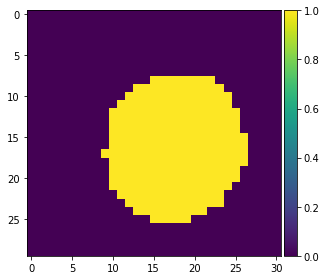

In [5]:
imshow(binary_image.max(axis=0))

In [6]:
stackview.slice(binary_image)

# Fit ellipse

In [9]:
Job.fit_ellipse()

Job.points['XYZ']

# Robert: I don't see the ellipse...

0      [12.624744165999557, 7.4141155935962075, 26.64...
1      [13.161391770572225, 8.841795606731457, 27.795...
2      [14.280665856874377, 6.9111772205361355, 25.98...
3      [11.160141423588044, 8.269820591392271, 26.958...
4      [14.966340599967031, 8.955006476005106, 27.553...
                             ...                        
251    [13.828307686670795, 22.692034542826082, 6.804...
252    [12.320883785575912, 25.603343510442727, 9.208...
253    [15.429731792017003, 24.352213930053395, 8.061...
254    [12.730105192518451, 24.021510111453193, 7.550...
255    [13.841883399700036, 25.208241248173543, 8.505...
Name: XYZ, Length: 256, dtype: object

In [10]:
Job.resample_surface()
Job.points # this appears to be a pandas table. I was expecting a list of points...

Shooting rays: 100%|████████████████████████████████████████████████████████████████| 256/256 [00:01<00:00, 171.06it/s]


248 out of 256 points were accepted for further processing.

---- Refinement-----
Iteration #1:


Finding normals: 628it [00:00, 905.56it/s]
Shooting rays: 100%|████████████████████████████████████████████████████████████████| 628/628 [00:02<00:00, 229.91it/s]


628 out of 628 points were accepted for further processing.
Iteration #2:


Finding normals: 605it [00:00, 904.06it/s]
Shooting rays: 100%|████████████████████████████████████████████████████████████████| 605/605 [00:02<00:00, 226.87it/s]

605 out of 605 points were accepted for further processing.


,XYZ,FitErrors,FitParams,Neighbours,N_Neighbours,Normals,N_neighbours,X,Y,Z
0,"[14.297229523820869, 17.137814786880742, 24.31...",0.0,0.0,"[1, 2, 8, 3, 13, 6, 0, 18, 10, 4, 15]",NaN,"[0.13095642305881391, 0.1912160341808226, 0.97...",11,14.297230,17.137815,24.311529
1,"[12.84772482964819, 16.242882316583124, 24.379...",0.0,0.0,"[19, 11, 7, 14, 1, 2, 5, 9, 3, 0]",NaN,"[-0.08174761516349598, 0.0214402735334147, 0.9...",10,12.847725,16.242882,24.379128
2,"[14.713347591757575, 15.855392771012085, 24.32...",0.0,0.0,"[1, 12, 20, 2, 8, 0, 4, 15]",NaN,"[0.19643390015407072, -0.03684771711613801, 0....",8,14.713348,15.855393,24.329147
3,"[13.312695131487462, 17.686375185259195, 24.25...",0.0,0.0,"[1, 16, 5, 9, 21, 3, 13, 6, 0, 10]",NaN,"[-0.0018163369592495802, 0.226383131430809, 0....",10,13.312695,17.686375,24.250609
4,"[15.33020664941858, 17.14964331328694, 25.1018...",0.0,0.0,"[2, 8, 6, 0, 10, 4, 15, 22]",NaN,"[0.2401266661596611, 0.12518015607992294, 0.96...",8,15.090080,17.024463,24.139242
...,...,...,...,...,...,...,...,...,...,...
600,"[14.833098858411013, 17.479309061665717, 10.82...",0.0,0.0,"[602, 604, 598, 588, 603, 597, 600, 590, 594, ...",NaN,"[0.2074461104176995, 0.05850396791711767, -0.9...",10,14.833099,17.479309,10.822127
601,"[12.432656867738908, 16.189301587363712, 10.71...",0.0,0.0,"[580, 591, 587, 601, 584, 595, 599, 603]",NaN,"[-0.19061865215194082, -0.0732822974020658, -0...",8,12.432657,16.189302,10.717126
602,"[14.578551665468934, 15.513080556444146, 10.71...",0.0,0.0,"[596, 602, 604, 585, 598, 592, 600]",NaN,"[0.11316279965251946, -0.027280505810945637, -...",7,14.578552,15.513081,10.719985
603,"[13.645074403079152, 17.662513357026892, 10.72...",0.0,0.0,"[601, 604, 595, 589, 599, 593, 603, 586, 597, ...",NaN,"[0.028298658032633026, 0.061086145022117753, -...",11,13.645074,17.662513,10.722119


In [11]:
# Curvature measurement
Job.fit_curvature()
Job.points['Curvature']


---- Curvature-----


Measuring mean curvature:   0%|                                                                | 0/605 [00:00<?, ?it/s]C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=37,29 m=925 fp=0.000050 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=40,34 m=1209 fp=0.000003 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
Measuring mean curvature:   1%|▎                                                       | 4/605 [00:00<

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,21 m=135 fp=0.260935 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=27,12 m=240 fp=2.337558 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too s

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,24 m=180 fp=18.534622 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=18,27 m=392 fp=0.046225 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too 

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,24 m=180 fp=1.222829 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=33,23 m=646 fp=0.000238 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too s

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,21 m=135 fp=10.613207 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,28 m=252 fp=4.698401 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
Measuring mean curvature:  17%|████████▊                                            | 100/605 [00:01<00:04, 103.27it/s]C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: Runtim

Measuring mean curvature:  21%|███████████▎                                         | 129/605 [00:01<00:03, 154.07it/s]C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,24 m=180 fp=1.480230 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=36,31 m=952 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: Runtime

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=14,26 m=286 fp=0.022680 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,24 m=208 fp=0.010913 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data poin

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=35,26 m=782 fp=0.000002 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=18,24 m=341 fp=1.826917 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data poin

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=11,4 m=175 fp=5210.959196 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,27 m=231 fp=0.243431 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of

Measuring mean curvature:  38%|████████████████████▏                                | 231/605 [00:01<00:02, 162.04it/s]C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=5,21 m=312 fp=4807.966552 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=30,19 m=455 fp=0.100515 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:97

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,27 m=234 fp=6.892108 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=23,11 m=175 fp=0.436720 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data poin

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=15,27 m=320 fp=0.558432 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
Measuring mean curvature:  47%|█████████████████████████▏                           | 287/605 [00:02<00:01, 161.98it/s]C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,21 m=135 fp=0.199048 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: Runtime

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=14,33 m=351 fp=0.479176 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,24 m=195 fp=5.050244 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data poin

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,25 m=204 fp=0.911602 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,26 m=234 fp=2.330340 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data poin

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=9,21 m=140 fp=5.572066 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=4,4 m=192 fp=5105.789772 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the num

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,24 m=234 fp=35022.806735 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,24 m=190 fp=3.442151 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s t

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=36,33 m=1050 fp=0.000065 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
Measuring mean curvature:  67%|███████████████████████████████████▌                 | 406/605 [00:02<00:01, 152.81it/s]C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=9,21 m=136 fp=1.556364 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977:

Measuring mean curvature:  71%|█████████████████████████████████████▌               | 429/605 [00:02<00:01, 171.26it/s]C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,26 m=210 fp=1.340985 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=7,24 m=180 fp=1880581.019358 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=9,22 m=160 fp=0.802297 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,29 m=280 fp=0.271552 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of da

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=12,25 m=217 fp=0.280750 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=10,22 m=150 fp=2.011508 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too s

Measuring mean curvature:  83%|████████████████████████████████████████████▏        | 505/605 [00:03<00:00, 184.45it/s]C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,23 m=168 fp=0.001376 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=15,4 m=245 fp=853.228376 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=4,28 m=252 fp=20045.238969 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=5,4 m=228 fp=9427.814497 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=34,38 m=1147 fp=0.000002 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=13,24 m=238 fp=1.549382 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data poi

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the additional knot would
coincide with an old one. Probable cause: s too small or too large
a weight to an inaccurate data point. (fp>s)
	kx,ky=1,1 nx,ny=7,29 m=273 fp=1171.485486 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=40,33 m=1170 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number o

C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=30,22 m=555 fp=0.000422 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=38,35 m=1170 fp=0.000032 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))
C:\Users\rober\miniconda3\envs\STRESS\lib\site-packages\scipy\interpolate\_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data poi

513 out of 605 points were accepted for further processing.


0        [0.3176035087717747]
1      [-0.20535521379945412]
2      [-0.28713146188884964]
3      [-0.18940657446739928]
4      [-0.35857564728578795]
                ...          
508      [0.2353096797322633]
509    [-0.01429703499785659]
510     [0.00806581406094186]
511     [0.18523789928774098]
512     [0.27705457889367086]
Name: Curvature, Length: 513, dtype: object

In [12]:
visualize(Job) # opens napari and shows results

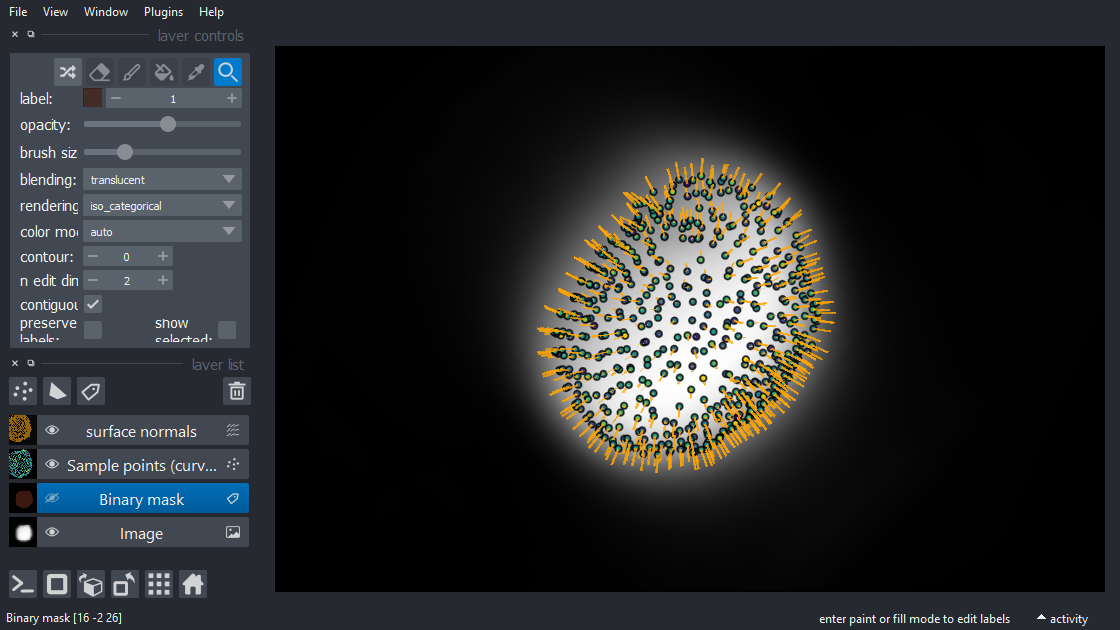

In [13]:
napari.utils.nbscreenshot(viewer)

In [ ]:
# Ok I must admit, this is amazing! 